In [1]:
%matplotlib inline
# %matplotlib

In [2]:
from __future__ import division,print_function

In [3]:
from spartan.utils import sklearn as splearn

In [4]:
import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectFromModel

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
sns.set_context('poster',)

In [7]:
tax_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/otu_table_mc2_w_tax_no_pynast_failures.biom.TAXON.tsv"
map_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/BL6SPFDec16map.txt"

In [8]:
tax = pd.read_csv(filepath_or_buffer=tax_path, sep='\t', 
                  quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None)

meta = pd.read_csv(filepath_or_buffer=map_path, sep='\t')

In [9]:
tax.head()

,OTU ID,23,25,27,28,30,39,41,8,24,7,9,5
0,206494,33,16,190,11,92,12,2272,2,0,0,0,0
1,276629,0,0,1,0,0,0,0,0,1,1,0,0
2,276620,0,0,0,0,0,0,0,0,2,1,1,0
3,330294,0,0,0,0,0,0,2,0,0,0,2,0
4,184456,1,0,0,0,0,0,1,0,0,0,0,0


In [10]:
tax.index = tax['OTU ID'].values
tax = tax.drop(['OTU ID'],axis=1)

In [11]:
tax.head()

,23,25,27,28,30,39,41,8,24,7,9,5
206494,33,16,190,11,92,12,2272,2,0,0,0,0
276629,0,0,1,0,0,0,0,0,1,1,0,0
276620,0,0,0,0,0,0,0,0,2,1,1,0
330294,0,0,0,0,0,0,2,0,0,0,2,0
184456,1,0,0,0,0,0,1,0,0,0,0,0


In [12]:
tax_scaled = tax.T.apply(lambda m: (m - m.mean())/m.std()).T
# tax_scaled = tax.T.apply(lambda m: (m / m.sum())).T
# tax_scaled = tax

In [13]:
tax_scaled.head()

,23,25,27,28,30,39,41,8,24,7,9,5
206494,-0.286613,-0.312809,-0.044687,-0.320513,-0.195698,-0.318972,3.163527,-0.334382,-0.337463,-0.337463,-0.337463,-0.337463
276629,-0.552771,-0.552771,1.658312,-0.552771,-0.552771,-0.552771,-0.552771,-0.552771,1.658312,1.658312,-0.552771,-0.552771
276620,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,-0.511766,2.558832,1.023533,1.023533,-0.511766
330294,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,2.140872,-0.428174,-0.428174,-0.428174,2.140872,-0.428174
184456,2.140872,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174,2.140872,-0.428174,-0.428174,-0.428174,-0.428174,-0.428174


In [14]:
s = tax.sum()

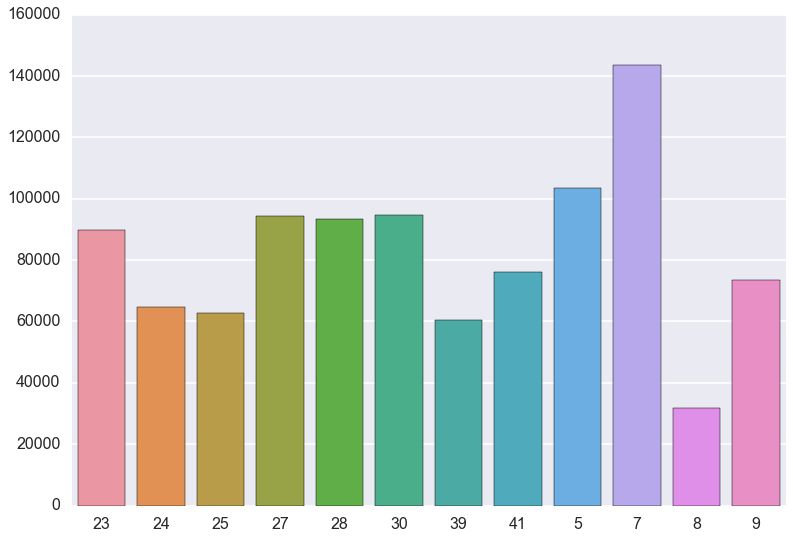

In [15]:
sns.barplot(x=s.index.values,y=s);

In [16]:
meta.SampleID = meta.SampleID.astype(str)

# Join meta data

In [17]:
meta.set_index('SampleID')

,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes
SampleID,,,,,,,,
23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230
24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234
25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221
41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226
27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227
5,I180,M,7/7/15,R,WKO,WKO (8/20/15),943948,Parent cage 892227
7,I182,M,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943948,Parent cage 892221
8,I183,M,7/1/15,RL,WT,WT,943948,Parent cage 892226
9,I184,M,7/1/15,2L,WT,WT,943948,Parent cage 892226


In [18]:
full_table = meta.set_index('SampleID').join(tax_scaled.T).reset_index()

In [19]:
full_table.head()

,SampleID,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes,206494,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230,-0.286613,...,2.140872,-0.552771,2.140872,2.140872,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
1,24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234,-0.337463,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
2,25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221,-0.312809,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.4022
3,41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226,3.163527,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
4,27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227,-0.044687,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.4022


# Set up test/train split

## Encode 'y' labels

In [20]:
y_geno = full_table['Genotype1']

In [21]:
geno_encoder = ppro.LabelEncoder()

In [22]:
y_geno_encoded = geno_encoder.fit_transform(y_geno)

## Encode 'X' data

In [23]:
X_cols_cat = list(full_table.columns[[2,7]].values)
X_cols_num = list(full_table.columns[9:])

In [24]:
# make the dummy variable columns for the original categorical data columns
# HOPEFULLY we dont run into colinearity issues
X_data_cat = pd.get_dummies(full_table[X_cols_cat].astype(str))

In [25]:
X_data_cat

,Gender_F,Gender_M,Cage_943947,Cage_943948,Cage_943951
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
5,0,1,0,1,0
6,0,1,0,1,0
7,0,1,0,1,0
8,0,1,0,1,0
9,1,0,0,0,1


In [26]:
# put all data columns together
X = pd.concat([X_data_cat,full_table[X_cols_num]],axis=1) # Accounting for Cages and Sex
# X = full_table[X_cols_num] # IGNORING Cages and Sex

In [27]:
X.head()

,Gender_F,Gender_M,Cage_943947,Cage_943948,Cage_943951,206494,276629,276620,330294,184456,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,1,0,1,0,0,-0.286613,-0.552771,-0.511766,-0.428174,2.140872,...,2.140872,-0.552771,2.140872,2.140872,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
1,1,0,1,0,0,-0.337463,1.658312,2.558832,-0.428174,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
2,1,0,1,0,0,-0.312809,-0.552771,-0.511766,-0.428174,-0.428174,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.4022
3,1,0,1,0,0,3.163527,-0.552771,-0.511766,2.140872,2.140872,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
4,1,0,1,0,0,-0.044687,1.658312,-0.511766,-0.428174,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.4022


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_geno_encoded,
                                                    test_size=0.33, random_state=42,
                                                   )



In [29]:
y_train

array([1, 0, 2, 0, 1, 2, 2, 0])

# Set up pipelines

## SVM classifier

In [30]:
svc_param_grid = {'svc__C': 10. ** np.arange(-3, 3),
                  'svc__gamma': 10. ** np.arange(-3, 3)
                 }



svc_pipe = make_pipeline(
                         SVC(kernel='linear', random_state=42))

In [31]:
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv=2)

In [32]:
# svc_grid.fit(X_train, y_train)
svc_grid.fit(X, y_geno_encoded)
print(svc_grid.best_params_)

{'svc__gamma': 0.001, 'svc__C': 0.001}


In [33]:
svc_grid.predict(X)

array([2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0])

In [34]:
y_geno_encoded

array([2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0])

In [35]:
svc_cm = confusion_matrix(y_geno_encoded,svc_grid.predict(X))

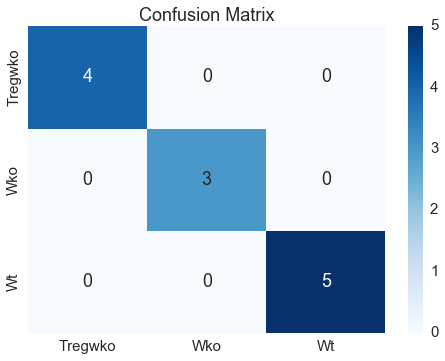

In [36]:
splearn.plot_confusion_matrix(cm=svc_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

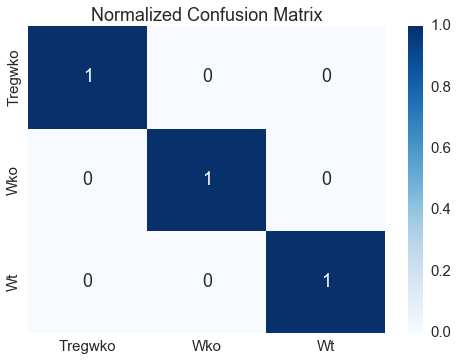

In [37]:
splearn.plot_confusion_matrix(cm=svc_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## RandomizedLogisticRegression

In [38]:
rfst_param_grid = {'randomforestclassifier__n_estimators': np.arange(1,15,),
                   'randomforestclassifier__min_samples_leaf': np.arange(1,10,2)
                  }
rfst_pipe = make_pipeline(RandomForestClassifier(random_state=42,n_jobs=8))

## RandomForestClassifier

In [39]:
# scaler_minmax = ppro.MinMaxScaler()

# clf_rfst = RandomForestClassifier(n_estimators=30, criterion='gini', 
#                                 max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                                 max_features='auto', max_leaf_nodes=None, 
#                                 bootstrap=True, oob_score=False, n_jobs=6,
#                                 random_state=None, verbose=0, warm_start=False, class_weight=None)


rfst_param_grid = {'extratreesclassifier__n_estimators': np.arange(10,200,20),
#                    'extratreesclassifier__min_samples_leaf': np.arange(1,10,2)
                  }
rfst_pipe = make_pipeline(ExtraTreesClassifier(random_state=42,n_jobs=8))

In [40]:
rfst_grid = GridSearchCV(rfst_pipe, param_grid=rfst_param_grid, cv=2)

In [41]:
# rfst_grid.fit(X_train, y_train)
rfst_grid.fit(X, y_geno_encoded)
print(rfst_grid.best_params_)

{'extratreesclassifier__n_estimators': 10}


In [42]:
rfst_cm = confusion_matrix(y_geno_encoded,rfst_grid.predict(X))

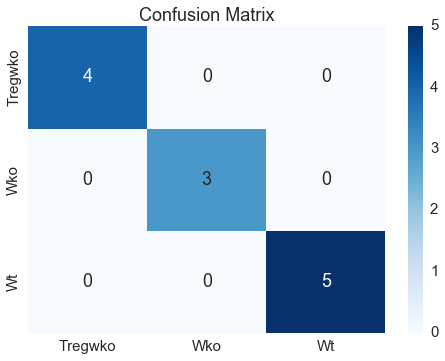

In [43]:
splearn.plot_confusion_matrix(cm=rfst_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

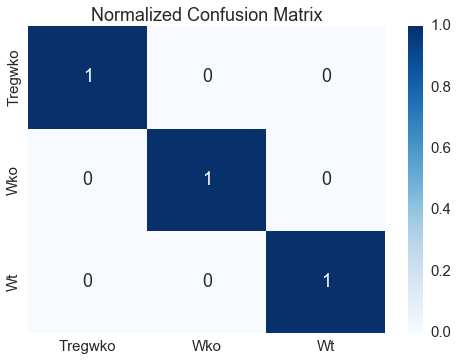

In [44]:
splearn.plot_confusion_matrix(cm=rfst_cm, labels=geno_encoder.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

In [45]:
# ExtraTreesClassifier

In [46]:
# # Build a forest and compute the feature importances
# forest = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)

# forest.fit(X, y_geno_encoded)
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


In [47]:
# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()


In [48]:
def repandasify(array, y_names, X_names=None):
    df = pd.DataFrame(data=array, index=y_names,columns=X_names)
    return df

In [49]:
pca = PCA(n_components=5, whiten=False)

In [50]:
pca.fit(X,y_geno_encoded)

PCA(copy=True, n_components=5, whiten=False)

In [51]:
pca.explained_variance_ratio_

array([ 0.15869476,  0.12211327,  0.10229866,  0.09732321,  0.09428467])

In [52]:
X.head()

,Gender_F,Gender_M,Cage_943947,Cage_943948,Cage_943951,206494,276629,276620,330294,184456,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,1,0,1,0,0,-0.286613,-0.552771,-0.511766,-0.428174,2.140872,...,2.140872,-0.552771,2.140872,2.140872,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
1,1,0,1,0,0,-0.337463,1.658312,2.558832,-0.428174,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
2,1,0,1,0,0,-0.312809,-0.552771,-0.511766,-0.428174,-0.428174,...,-0.428174,1.658312,-0.428174,-0.428174,1.658312,-0.428174,-0.428174,2.140872,-0.428174,-0.4022
3,1,0,1,0,0,3.163527,-0.552771,-0.511766,2.140872,2.140872,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,-0.428174,-0.428174,-0.428174,-0.4022
4,1,0,1,0,0,-0.044687,1.658312,-0.511766,-0.428174,-0.428174,...,-0.428174,-0.552771,-0.428174,-0.428174,-0.552771,-0.428174,2.140872,2.140872,2.140872,-0.4022


In [53]:
pca_t = pca.transform(X)

In [54]:
len(pca_t[0])

5

In [55]:
pca_t_l = repandasify(array=pca_t, y_names=geno_encoder.inverse_transform(y_geno_encoded), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])

In [56]:
pca_t_l['geno'] = pca_t_l.index.values
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l

,PC 1,PC 2,PC 3,PC 4,PC 5,geno
0,-35.477421,22.332089,-7.240686,-19.499166,-79.436026,WT
1,-16.386799,9.908186,5.014176,2.964049,-6.648642,WT
2,-14.677214,14.191986,0.905559,-18.399109,0.145031,TregWKO
3,3.757204,-1.932621,91.678479,-17.467544,24.663880,WT
4,-25.895465,7.240665,-36.930095,24.101162,49.365292,WKO
5,33.924463,-106.781389,-15.162177,-10.422901,-14.804624,WKO
6,117.062061,43.149344,-12.868578,16.069599,-9.207931,TregWKO
7,-9.645054,1.630091,2.478816,-0.875291,-2.605149,WT
8,5.905281,-3.670544,13.196164,3.430027,11.401336,WT
9,-31.821410,-8.292864,1.914710,81.307666,-5.516371,WKO


In [57]:
pca_t_l

,PC 1,PC 2,PC 3,PC 4,PC 5,geno
0,-35.477421,22.332089,-7.240686,-19.499166,-79.436026,WT
1,-16.386799,9.908186,5.014176,2.964049,-6.648642,WT
2,-14.677214,14.191986,0.905559,-18.399109,0.145031,TregWKO
3,3.757204,-1.932621,91.678479,-17.467544,24.663880,WT
4,-25.895465,7.240665,-36.930095,24.101162,49.365292,WKO
5,33.924463,-106.781389,-15.162177,-10.422901,-14.804624,WKO
6,117.062061,43.149344,-12.868578,16.069599,-9.207931,TregWKO
7,-9.645054,1.630091,2.478816,-0.875291,-2.605149,WT
8,5.905281,-3.670544,13.196164,3.430027,11.401336,WT
9,-31.821410,-8.292864,1.914710,81.307666,-5.516371,WKO


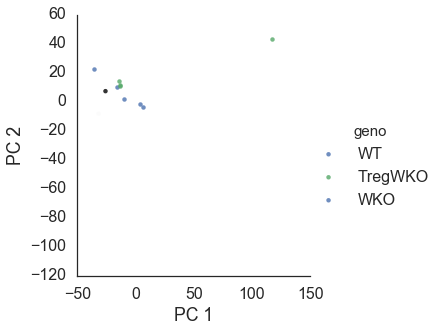

In [58]:
with sns.axes_style("white"):
    sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l, 
               hue='geno', palette=None,
               fit_reg=False);